In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("./global_lyon_file.csv", parse_dates=["datetime"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42278 entries, 0 to 42277
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  42278 non-null  object 
 1   sensor    42278 non-null  float64
 2   no2       42153 non-null  float64
 3   o3        41979 non-null  float64
 4   pm10      42127 non-null  float64
 5   pm25      41807 non-null  float64
 6   no        7718 non-null   float64
dtypes: float64(6), object(1)
memory usage: 2.3+ MB


In [4]:
df.describe()

,sensor,no2,o3,pm10,pm25,no
count,42278.000000,42153.000000,41979.000000,42127.000000,41807.000000,7718.000000
mean,3385.696574,25.507455,46.518065,19.180295,11.499255,11.809887
std,77.646467,16.068292,31.562760,24.518998,10.352668,16.795319
min,2696.000000,-1.000000,-3.300000,-1.000000,-1.050000,-0.125000
25%,3391.750000,13.700000,20.800000,9.800000,5.150000,2.675000
50%,3391.750000,21.975000,44.833333,15.300000,8.466667,6.400000
75%,3391.750000,33.633333,67.800000,24.050000,14.166667,12.893750
max,3647.000000,143.300000,246.200000,2447.700000,334.200000,207.633333


In [5]:
df.isna().sum()

datetime        0
sensor          0
no2           125
o3            299
pm10          151
pm25          471
no          34560
dtype: int64

<Axes: xlabel='datetime'>

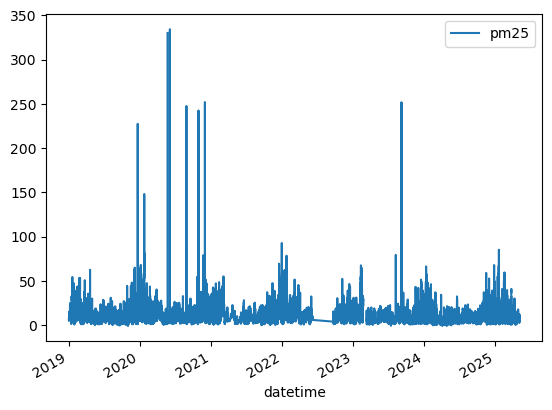

In [6]:
df.plot(x='datetime', y='pm25')

In [7]:
#cutoff = pd.Timestamp("2023-04-01T01:00:00+02:00")

In [8]:
#df = df[df['datetime'] >= cutoff]

<Axes: xlabel='datetime'>

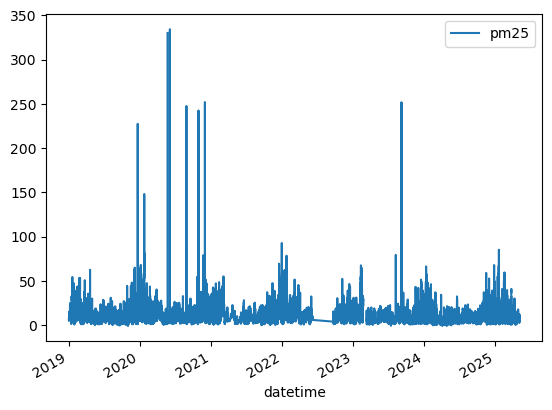

In [9]:
df.plot(x='datetime', y='pm25')

In [10]:
df.isna().sum()

datetime        0
sensor          0
no2           125
o3            299
pm10          151
pm25          471
no          34560
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42278 entries, 0 to 42277
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  42278 non-null  object 
 1   sensor    42278 non-null  float64
 2   no2       42153 non-null  float64
 3   o3        41979 non-null  float64
 4   pm10      42127 non-null  float64
 5   pm25      41807 non-null  float64
 6   no        7718 non-null   float64
dtypes: float64(6), object(1)
memory usage: 2.3+ MB


In [12]:
df = df.drop(columns=['sensor', 'no'])

In [13]:
df['datetime'] = pd.to_datetime(df['datetime'], utc=True)

In [14]:
df = df.set_index('datetime')
df = df.sort_index()

In [15]:
print(type(df.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


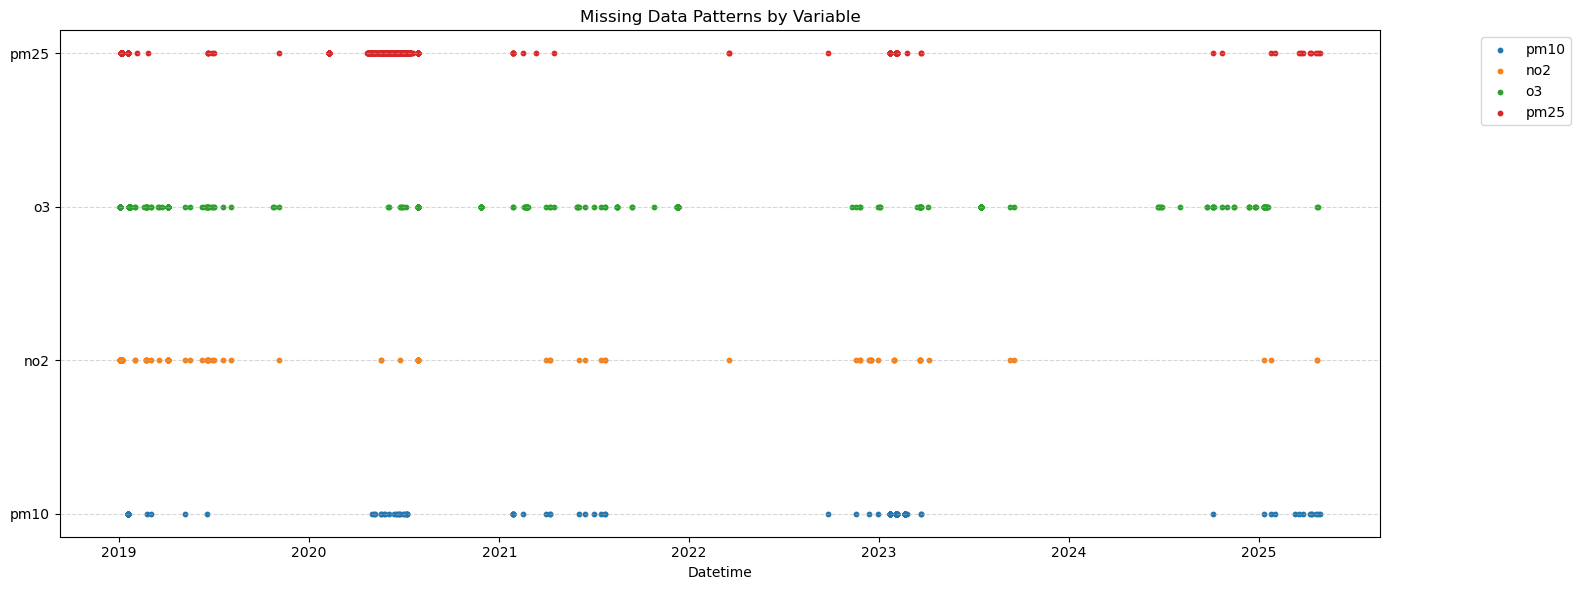

In [16]:
import numpy as np
columns = ['pm10', 'no2', 'o3', 'pm25']

offsets = {col: i for i, col in enumerate(columns)}

plt.figure(figsize=(14, 6))

for col in columns:
    missing_mask = df[col].isna()
    datetimes = df.index[missing_mask]
    y = np.full(len(datetimes), offsets[col])

    plt.scatter(datetimes, y, label=col, s=10)

plt.yticks(list(offsets.values()), list(offsets.keys()))
plt.xlabel("Datetime")
plt.title("Missing Data Patterns by Variable")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.show()

In [17]:
df_interp = df.interpolate(method='time')

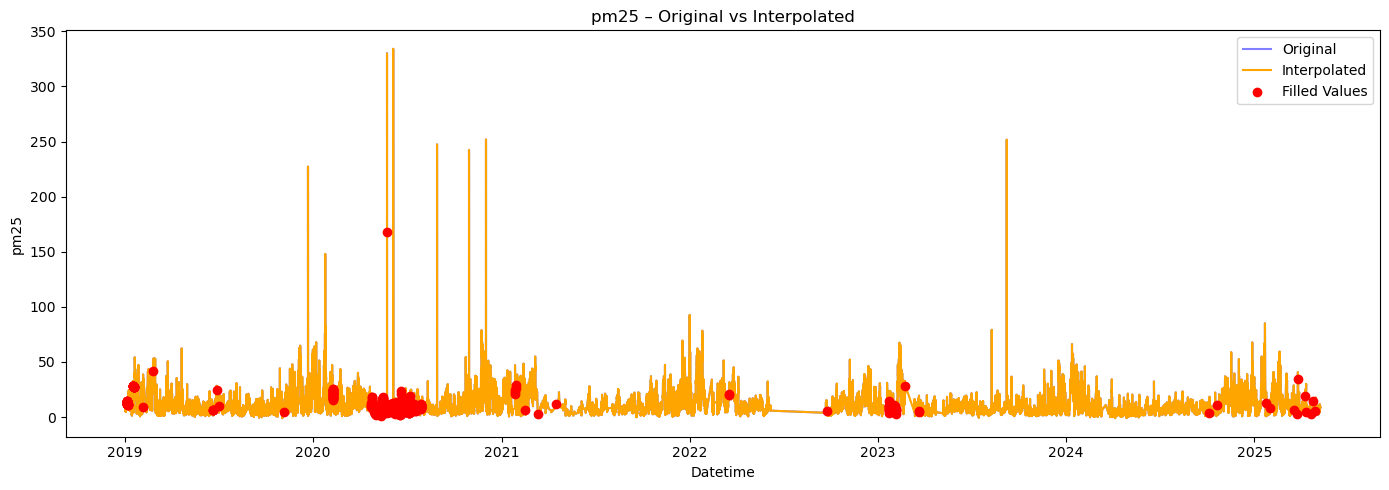

In [18]:
col = 'pm25'

# Plot all values
plt.figure(figsize=(14, 5))
plt.plot(df.index, df[col], label='Original', color='blue', alpha=0.5)
plt.plot(df_interp.index, df_interp[col], label='Interpolated', color='orange')

# Highlight interpolated points
interpolated_points = df[col].isna()
plt.scatter(df_interp.index[interpolated_points],
            df_interp[col][interpolated_points],
            color='red', label='Filled Values', zorder=3)

plt.title(f"{col} – Original vs Interpolated")
plt.xlabel("Datetime")
plt.ylabel(col)
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
# Transform the dataset into a daily one, for a smoother curve
df_daily = df.resample('D').mean()

In [20]:
# Reindex the dataset to add the seemingly missing dates
full_range = pd.date_range(start=df_daily.index.min(), end=df_daily.index.max(), freq='D')
df_daily = df_daily.reindex(full_range)

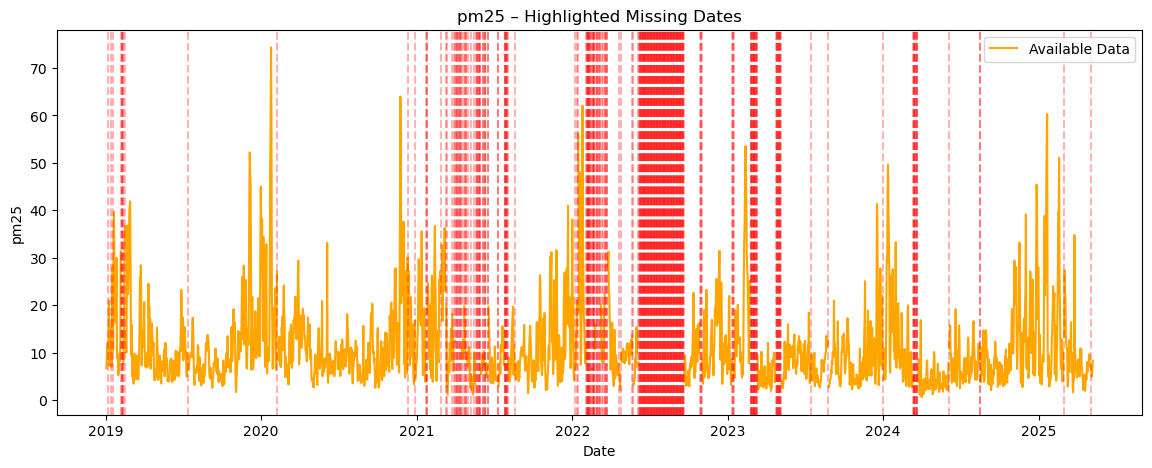

In [21]:
# Highlighting the missing values
import matplotlib.pyplot as plt

col = 'pm25'

plt.figure(figsize=(14, 5))

# Plot the available data
plt.plot(df_daily.index, df_daily[col], label='Available Data', color='orange')

# Find missing dates
missing_dates = df_daily[df_daily[col].isna()].index

# Highlight missing dates
for date in missing_dates:
    plt.axvline(x=date, color='red', alpha=0.3, linestyle='--')

plt.title(f"{col} – Highlighted Missing Dates")
plt.xlabel("Date")
plt.ylabel(col)
plt.legend()
#plt.tight_layout()
plt.show()


In [22]:
df_daily.isna().sum()

no2     260
o3      264
pm10    260
pm25    263
dtype: int64

In [23]:
df_daily.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2319 entries, 2019-01-02 00:00:00+00:00 to 2025-05-08 00:00:00+00:00
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   no2     2059 non-null   float64
 1   o3      2055 non-null   float64
 2   pm10    2059 non-null   float64
 3   pm25    2056 non-null   float64
dtypes: float64(4)
memory usage: 90.6 KB


<Axes: >

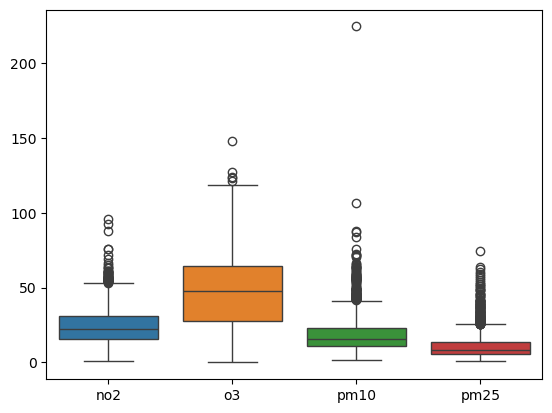

In [24]:
import seaborn as sns
sns.boxplot(data=df_daily)

As our values are bound to 0, we have a right-skewed distribution, so we're only getting upper outliers. Most of them are really close to the upper whisker and seem to be part of the distribution. Let's check it : so we won't rule them out. The only one that we will be deleting is the extreme one in pm10.

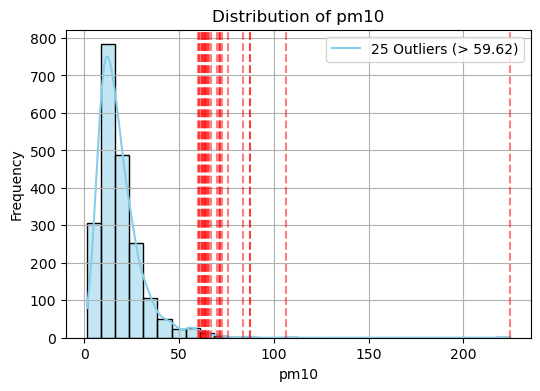

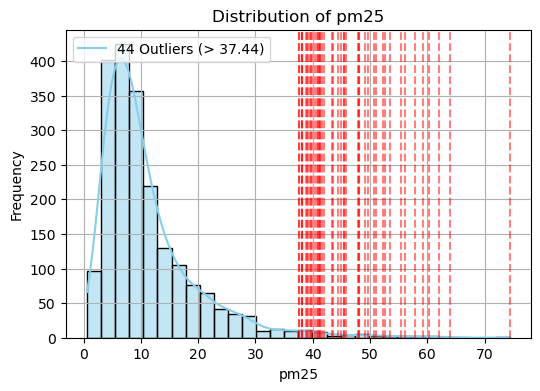

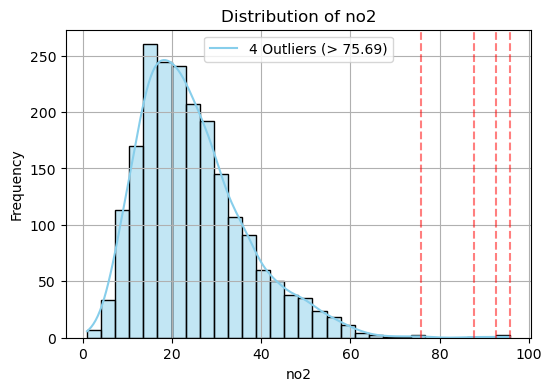

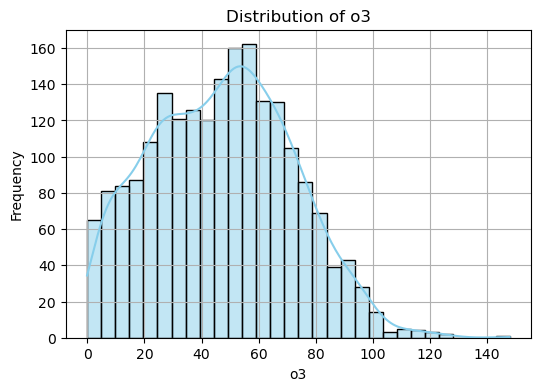

In [25]:
# Define the columns to plot
columns = ["pm10", "pm25", "no2", "o3"]  # Update as needed

for col in columns:
    data = df_daily[col]
    
    # Compute upper bound for extreme outliers (3*IQR)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 3 * IQR

    # Identify the single largest outlier (if any)
    outliers = data[data > upper_bound]

    # Plot histogram with KDE
    plt.figure(figsize=(6, 4))
    sns.histplot(data, kde=True, bins=30, color='skyblue')

    # Add vertical line for the outlier
    for val in outliers:
        plt.axvline(val, color='red', linestyle='--', alpha=0.5)
    if not outliers.empty:
        plt.legend([f"{len(outliers)} Outliers (> {upper_bound:.2f})"])

    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

It confirms what we thought, all the outliers for the parameters seem to be in the distribution, only one in pm10 is an extreme outlier. We will get rid of this one and keep all the others.

In [26]:
Q1 = df_daily["pm10"].quantile(0.25)
Q3 = df_daily["pm10"].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 3 * IQR  # Using 3×IQR for extreme outliers

# Find the index of the extreme outlier(s)
max_pm10_outlier = df_daily[df_daily["pm10"] > upper_bound]["pm10"].max()
print(f"Max outlier : {max_pm10_outlier}")

Max outlier : 224.4375


In [27]:
df_daily.loc[df_daily["pm10"] == max_pm10_outlier, "pm10"] = np.nan

<Axes: >

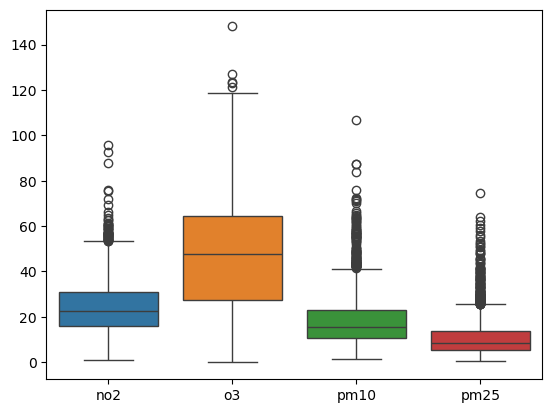

In [28]:
sns.boxplot(data=df_daily)

In [29]:
df_daily_interpolated = df_daily.interpolate(method='time')

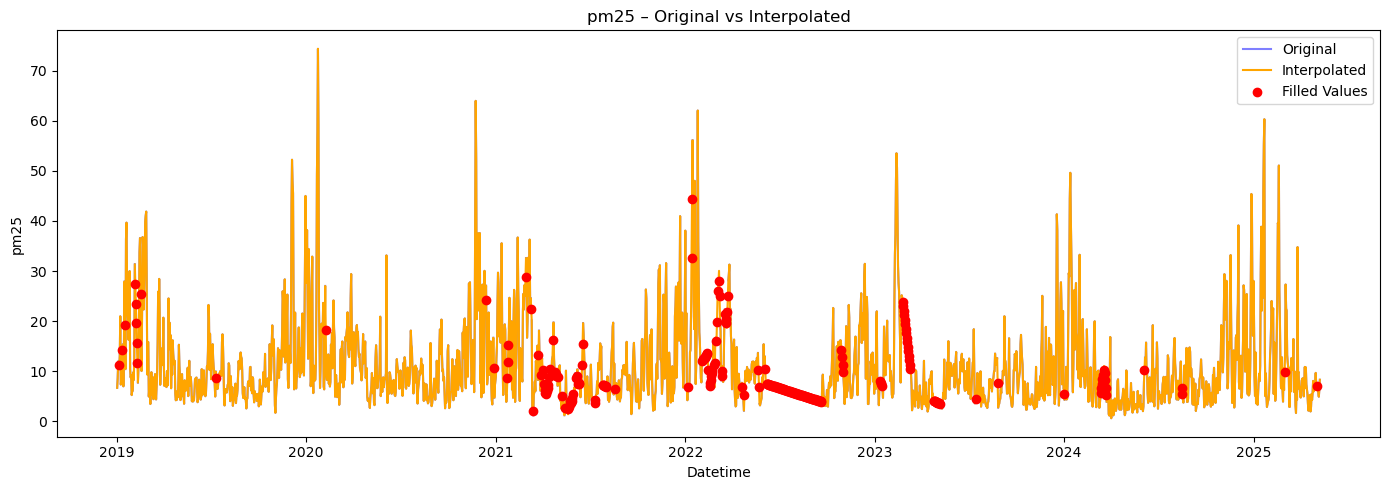

In [30]:
col = 'pm25'

# Plot all values
plt.figure(figsize=(14, 5))
plt.plot(df_daily.index, df_daily[col], label='Original', color='blue', alpha=0.5)
plt.plot(df_daily_interpolated.index, df_daily_interpolated[col], label='Interpolated', color='orange')

# Highlight interpolated points
interpolated_points = df_daily[col].isna()
plt.scatter(df_daily_interpolated.index[interpolated_points],
            df_daily_interpolated[col][interpolated_points],
            color='red', label='Filled Values', zorder=3)

plt.title(f"{col} – Original vs Interpolated")
plt.xlabel("Datetime")
plt.ylabel(col)
plt.legend()
plt.tight_layout()
plt.show()

The filled values are not really acceptable, specially for the gap during 2022. The other methods of filling missing values would be forward fill or backward fill, and they will not be good at all.
I will try to use the mean of the values of the previous year and the next year to replace the values missing in the big gap. This way, hopefully we will keep the seasonning of the dataset at the expense of a potential trend that doesn't seem obvious.

In [31]:
# Defining the missing range
missing_start = pd.Timestamp("2022-06-17", tz="UTC")
missing_end = pd.Timestamp("2022-09-21", tz="UTC")
missing_range = pd.date_range(start=missing_start, end=missing_end, freq="D", tz="UTC")

# Define periods to take the average from
period_2021 = pd.date_range(start="2021-06-17", end="2021-09-21", freq="D", tz="UTC")
period_2023 = pd.date_range(start="2023-06-17", end="2023-09-21", freq="D", tz="UTC")

# Select data from the two reference years
df_2021 = df_daily.loc[period_2021]
df_2023 = df_daily.loc[period_2023]

# Average the values
df_avg_fill = (df_2021.reset_index(drop=True) + df_2023.reset_index(drop=True)) / 2
df_avg_fill.index = missing_range  # assign missing dates to the average values

# Fill missing dates
#df_daily.update(df_avg_fill)

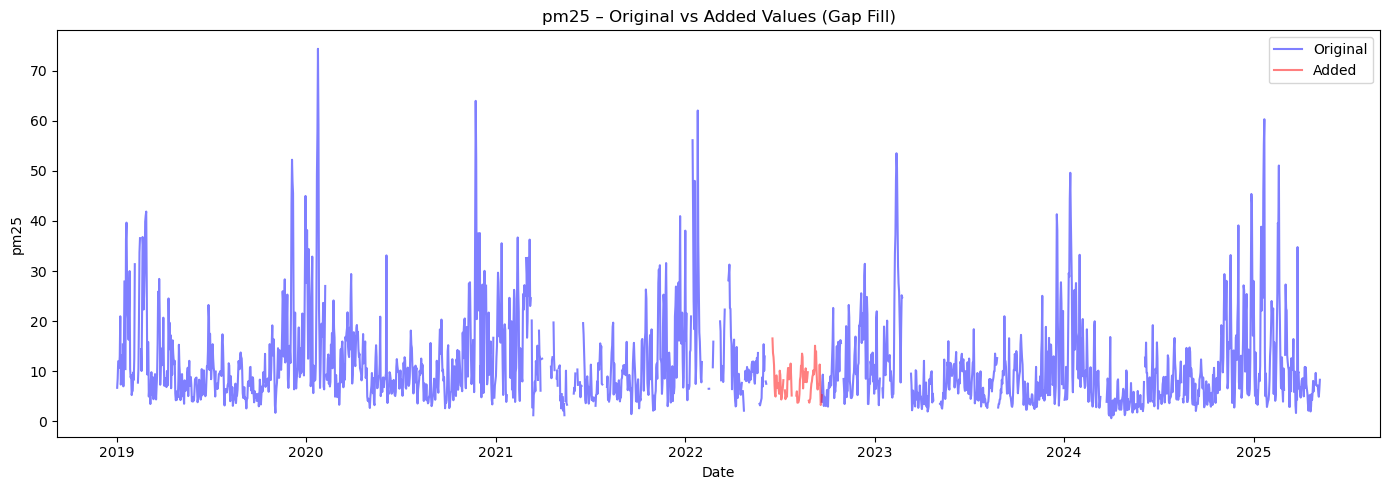

In [32]:
col = "pm25"
plt.figure(figsize=(14, 5))
plt.plot(df_daily.index, df_daily[col], label='Original', color='blue', alpha=0.5)
plt.plot(df_avg_fill.index, df_avg_fill[col], label='Added', color='red', alpha=0.5)

plt.title(f"{col} – Original vs Added Values (Gap Fill)")
plt.xlabel("Date")
plt.ylabel(col)
plt.legend()
plt.tight_layout()
plt.show()

There seem to be missing values in our extrapolation, let's zoom in to check.

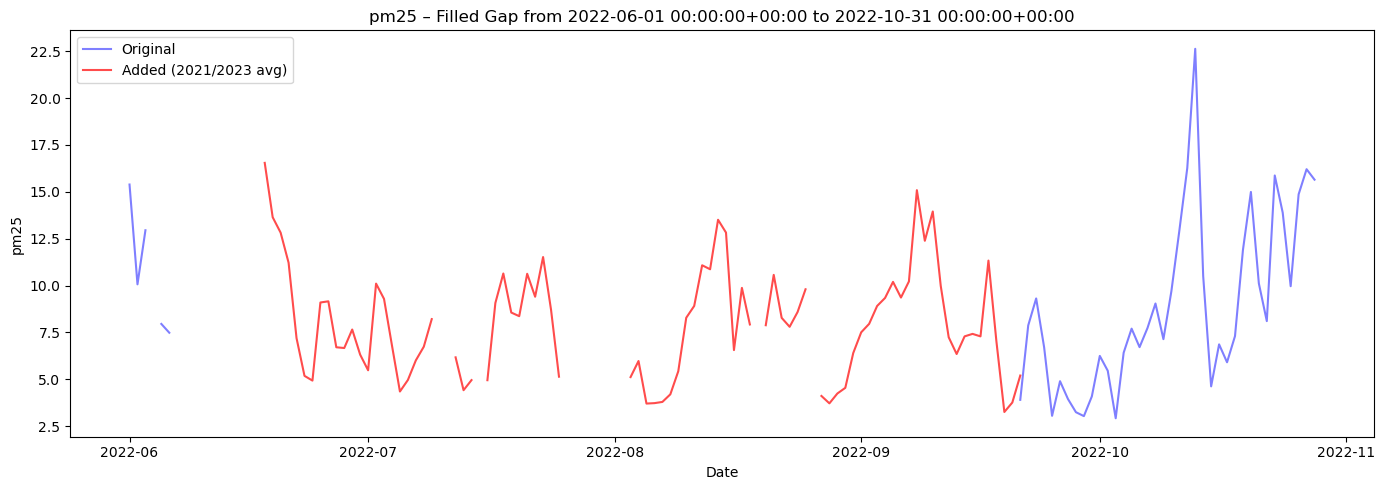

In [33]:
col = "pm25"
start = pd.Timestamp("2022-06-01", tz="UTC")
end = pd.Timestamp("2022-10-31", tz="UTC")

plt.figure(figsize=(14, 5))

# Filter both DataFrames
df_orig_zoom = df_daily.loc[start:end]
df_fill_zoom = df_avg_fill.loc[start:end]

# Plot
plt.plot(df_orig_zoom.index, df_orig_zoom[col], label='Original', color='blue', alpha=0.5)
plt.plot(df_fill_zoom.index, df_fill_zoom[col], label='Added (2021/2023 avg)', color='red', alpha=0.7)

plt.title(f"{col} – Filled Gap from {start} to {end}")
plt.xlabel("Date")
plt.ylabel(col)
plt.legend()
plt.tight_layout()
plt.show()

There's indeed missing values in the filling, it certainly comes from missing values in the previous or next year as we are then unable to compute the mean.

Let's check the values for this period in 2021 and 2023

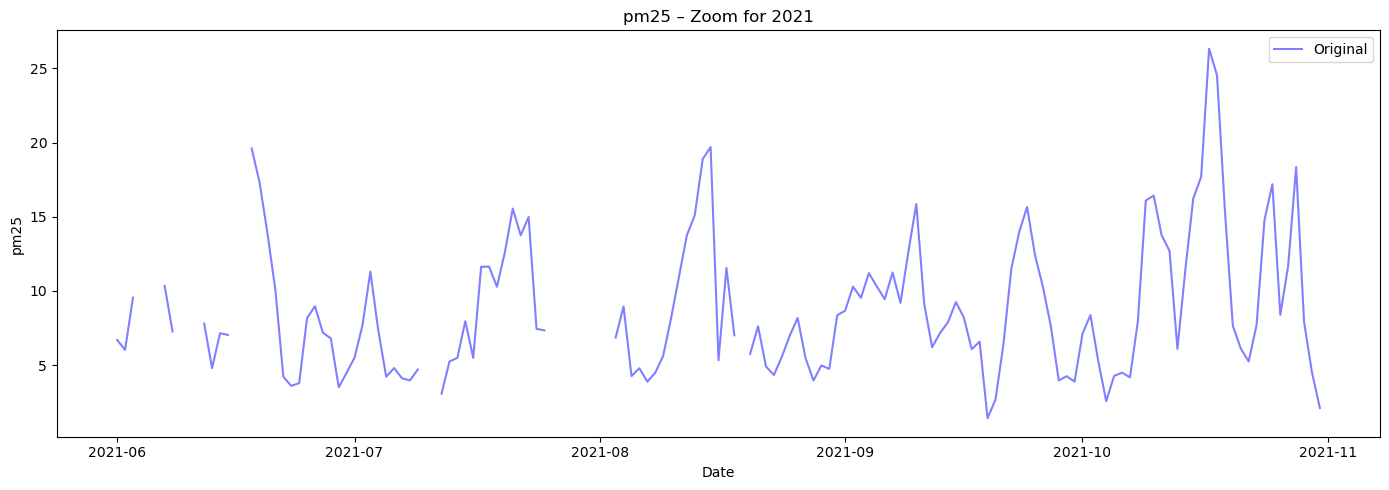

In [34]:
col = "pm25"
start = pd.Timestamp("2021-06-01", tz="UTC")
end = pd.Timestamp("2021-10-31", tz="UTC")

plt.figure(figsize=(14, 5))

# Filter both DataFrames
df_orig_zoom = df_daily.loc[start:end]

# Plot
plt.plot(df_orig_zoom.index, df_orig_zoom[col], label='Original', color='blue', alpha=0.5)

plt.title(f"{col} – Zoom for 2021")
plt.xlabel("Date")
plt.ylabel(col)
plt.legend()
plt.tight_layout()
plt.show()

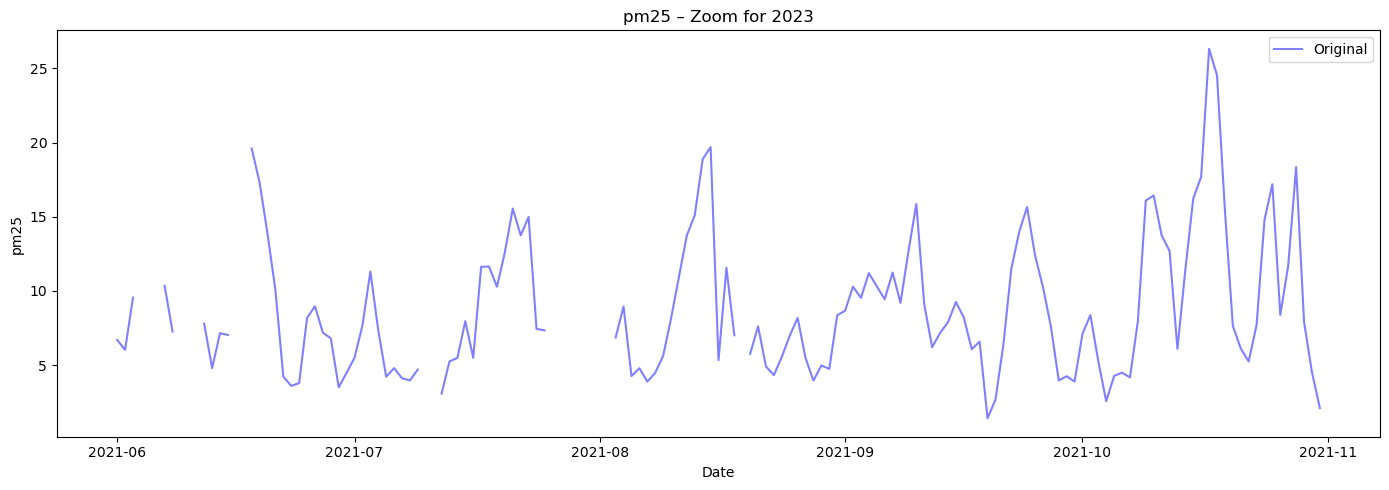

In [35]:
col = "pm25"
gap_start = pd.Timestamp("2023-06-01", tz="UTC")
gap_end = pd.Timestamp("2023-10-31", tz="UTC")

plt.figure(figsize=(14, 5))

# Filter both DataFrames
df_orig_zoom = df_daily.loc[start:end]

# Plot
plt.plot(df_orig_zoom.index, df_orig_zoom[col], label='Original', color='blue', alpha=0.5)

plt.title(f"{col} – Zoom for 2023")
plt.xlabel("Date")
plt.ylabel(col)
plt.legend()
plt.tight_layout()
plt.show()

We have missing datas for these periods.

Let's fill the missing values other than our gap with linear regression. The result will be pretty ok as there only are few values missing here and there. We will be able to compute the mean thanks to this.

In [36]:
df_daily_masked = df_daily.copy()
# Linear Regression filling :
df_interpolated = df_daily_masked.interpolate(method='time')

In [37]:
# The filling has filled every missing values, we don't want that. We want to fill the big 2022 gap with specific values.
# So we will erase the filled values for this period of time.
gap_start = pd.Timestamp("2022-06-07", tz="UTC")
gap_end = pd.Timestamp("2022-09-21", tz="UTC")
df_interpolated.loc[gap_start:gap_end] = np.nan

In [38]:
print(df_interpolated.loc[gap_start:gap_end].isna().all())

no2     True
o3      True
pm10    True
pm25    True
dtype: bool


We just confirmed that we deleted the interpolated values in our gap, now let's see visually the interpolated values for 2021 and 2023

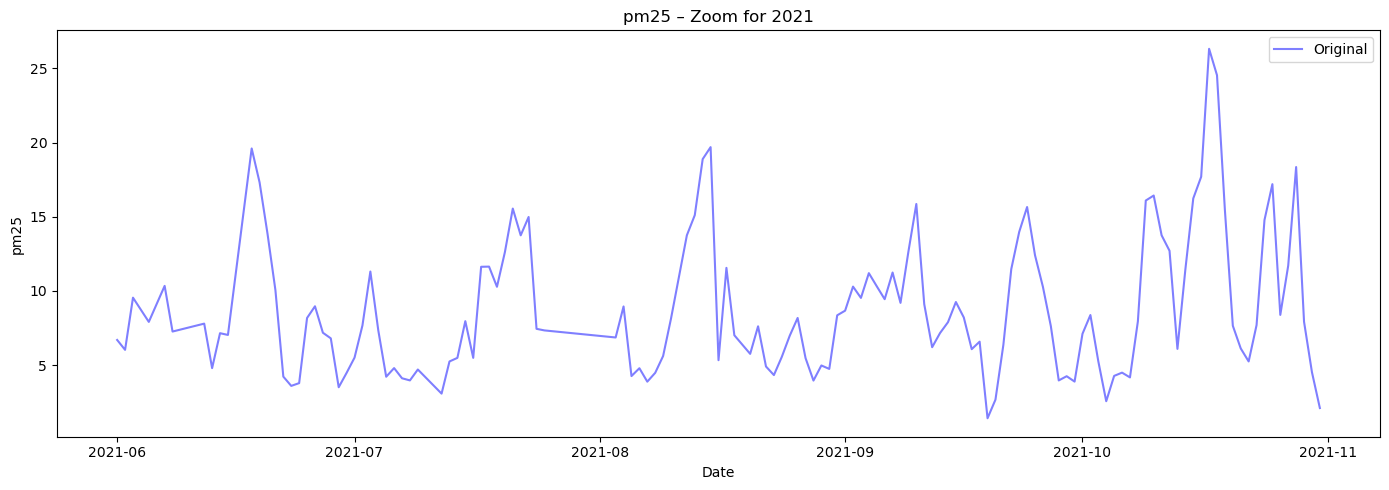

In [39]:
col = "pm25"
start = pd.Timestamp("2021-06-01", tz="UTC")
end = pd.Timestamp("2021-10-31", tz="UTC")

plt.figure(figsize=(14, 5))

# Filter both DataFrames
df_orig_zoom = df_interpolated.loc[start:end]

# Plot
plt.plot(df_orig_zoom.index, df_orig_zoom[col], label='Original', color='blue', alpha=0.5)

plt.title(f"{col} – Zoom for 2021")
plt.xlabel("Date")
plt.ylabel(col)
plt.legend()
plt.tight_layout()
plt.show()

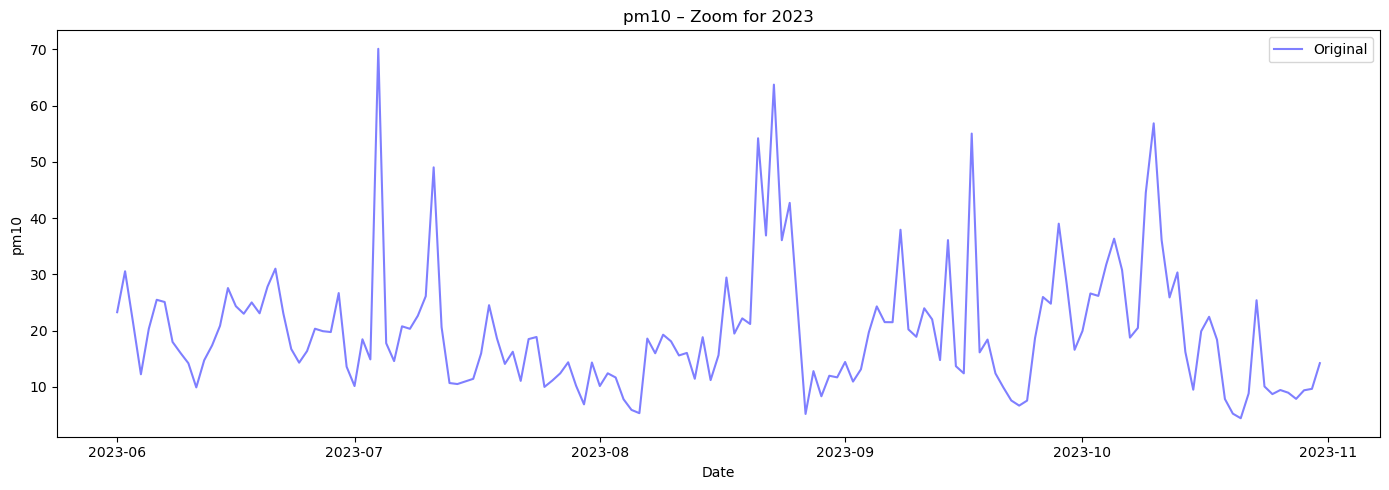

In [40]:
col = "pm10"
start = pd.Timestamp("2023-06-01", tz="UTC")
end = pd.Timestamp("2023-10-31", tz="UTC")

plt.figure(figsize=(14, 5))

# Filter both DataFrames
df_orig_zoom = df_interpolated.loc[start:end]

# Plot
plt.plot(df_orig_zoom.index, df_orig_zoom[col], label='Original', color='blue', alpha=0.5)

plt.title(f"{col} – Zoom for 2023")
plt.xlabel("Date")
plt.ylabel(col)
plt.legend()
plt.tight_layout()
plt.show()

We have confirmed visually that there is no more missing values in 2021 and 2023 that could mess with our filling.

In [41]:
gap_start = pd.Timestamp("2022-06-07", tz="UTC")
gap_end = pd.Timestamp("2022-09-21", tz="UTC")

df_previous = df_interpolated.loc[gap_start - pd.DateOffset(years=1): gap_end - pd.DateOffset(years=1)]
df_next = df_interpolated.loc[gap_start + pd.DateOffset(years=1): gap_end + pd.DateOffset(years=1)]

In [42]:
# We delete the indexes of each new dataframes so we can compute them together
df_previous_reset = df_previous.reset_index(drop=True)
df_next_reset = df_next.reset_index(drop=True)

# Now we can compute the mean and put it back into the database
filled_values = (df_previous_reset + df_next_reset) / 2
filled_values_indexed = filled_values.set_axis(df_interpolated.loc[gap_start:gap_end].index)

df_interpolated_filled = df_interpolated.copy()
df_interpolated_filled.loc[gap_start:gap_end] = filled_values_indexed

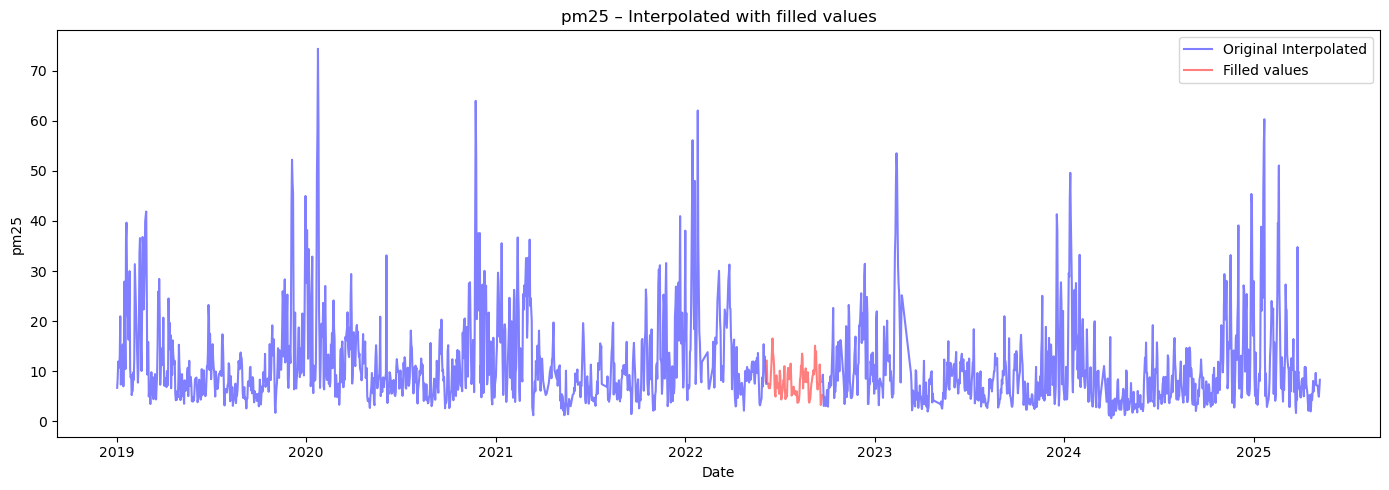

In [43]:
col = "pm25"

plt.figure(figsize=(14, 5))

plt.plot(df_interpolated.index, df_interpolated[col], label = 'Original Interpolated', color='blue', alpha=0.5)
plt.plot(filled_values_indexed.index, filled_values_indexed[col], label = 'Filled values', color='red', alpha=0.5)

plt.title(f"{col} – Interpolated with filled values")
plt.xlabel("Date")
plt.ylabel(col)
plt.legend()
plt.tight_layout()
plt.show()

As our values are bound to 0, we have a right-skewed distribution, so we're only getting upper outliers. Most of them are really close to the upper whisker, so we won't rule them out. The only one that we will be deleting is the extreme one in pm10.

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

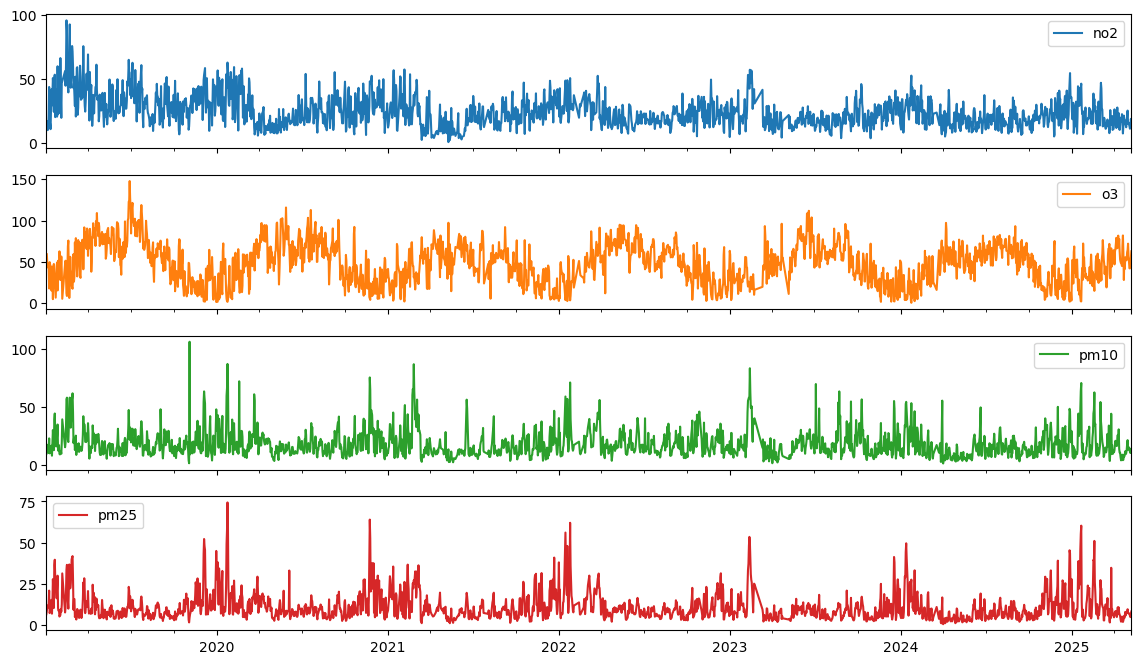

In [45]:
df_interpolated_filled.plot(subplots=True, figsize=(14, 8))


Let's check the stationarity of the parameters

In [46]:
from statsmodels.tsa.stattools import adfuller

In [47]:
def test_stationarity(series, name):
    result = adfuller(series.dropna())
    print(f"\n{name}")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    if result[1] < 0.05:
        print("=> Stationary ✅")
    else:
        print("=> Non-stationary ❌")

In [48]:
for col in df_interpolated_filled.columns:
    test_stationarity(df_interpolated_filled[col], col)


no2
ADF Statistic: -3.9646
p-value: 0.0016
=> Stationary ✅

o3
ADF Statistic: -4.0152
p-value: 0.0013
=> Stationary ✅

pm10
ADF Statistic: -9.6665
p-value: 0.0000
=> Stationary ✅

pm25
ADF Statistic: -5.3443
p-value: 0.0000
=> Stationary ✅


With p-values < 0.005, we have strong evidence that the serie is stationary, and we will be able to model it.

Let's add now some time-based feature to our data, like month, day of the week, week-end. It will be helpfull to the model for a better modelisation.

In [49]:
df_interpolated_filled['month'] = df_interpolated_filled.index.month
df_interpolated_filled['day_of_week'] = df_interpolated_filled.index.dayofweek
df_interpolated_filled['is_weekend'] = df_interpolated_filled['day_of_week'] >= 5

Now we'll add a rolling means to allow our model to capture trend.

In [51]:
for col in ["pm10", "no2", "o3"]:
    df_interpolated_filled[f"{col}_roll_3"] = df_interpolated[col].rolling(window=3).mean()
    df_interpolated_filled[f"{col}_roll_7"] = df_interpolated[col].rolling(window=7).mean()

We need to drop the NA columns introduced at the start and the end of the dataset because of the rolling means

In [52]:
df_interpolated_filled = df_interpolated_filled.dropna()

We transform now the file into a csv to upload into our database

In [53]:
df_interpolated_filled.to_csv("cleaned_lyon_timeseries.csv", index=True)